# In This Notebook

 * Mathematical Model
 * Model Testing for Different Scenarios
 * Sensitivity Study for PID Coefficients on Response
 * Sensitivity Study for PID Coefficients on Performance Characteristics

# Mathematical Model

In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import scipy as sp


In [5]:
%matplotlib

Using matplotlib backend: <object object at 0x000002BA7A73CC80>


In [3]:
#parameters
tf = 7      #time period of simulation
limit = 35   #limit of angle of beam in degrees
L = 0.3    #beam length
m = 0.023    #ball mass
R = 0.02    #ball radius
g = -9.8      #gravitational acceleration
d = 0.03     #lever arm offset
J = (2/3)*m*R**2    #Moment of inertia of a hollow sphere
#J = (2/5)*m*R**2   #Moment of inertia of a solid sphere

def ballbeammodel(Kp,Kd,Ki,dt,SP):
    dt = dt    #time constant
    t = 0
    x = 0.05
    SP = SP 
    v = 0
    u = 0
    Ierror = 0
    uprev = 0
    
    Ulis = []
    Ulis.append(u)
    Xlis = []
    Xlis.append(x)
    Tlis = []
    Tlis.append(t)
    Vlis = []
    Vlis.append(v)
    
    while (t<tf):
        u = max((-limit*(np.pi/180)),min((limit*(np.pi/180)),Kp*(x-SP)+Kd*v+Ki*((x-SP)*(dt))))*(d/L)
        
        udot = (u-uprev)/dt
        t += dt
        v += ((m*g*np.sin(u)+(m*x*udot**2))/(((J/R**2)+m)))*(dt)
        x += v*(dt)
        x = max(0,min(L,x))
        uprev = u
        
        
        Ulis.append(u)
        Tlis.append(t)
        Vlis.append(v)
        Xlis.append(x)
        
#         PO = (np.max(Xlis)-SP)/SP*100
#         for i in range(len(Xlis)):
#             if Xlis[i]>(SP*1.01) or Xlis[i]<(SP*0.99):
#                 ST = Tlis[i]
    return Tlis,Xlis,Ulis,Vlis



# TESTING MANUALLY OBTAINED PID

In [6]:
T,X,U,V = ballbeammodel(3,4,0.3,0.014,0.15)
plt.figure(90)
plt.plot(T,X)
plt.axhline(0.15,linestyle ='--',color = 'r')
extraticks = [0.15]
plt.yticks(list(plt.yticks()[0]) + extraticks)

([<matplotlib.axis.YTick at 0x2ba01028dc0>,
 [Text(0, 0.04, '0.04'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.08, '0.08'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.12, '0.12'),
  Text(0, 0.14, '0.14'),
  Text(0, 0.16, '0.16'),
  Text(0, 0.15, '0.15')])

# GENETIC ALGORITHM TUNING RESULTS TEST

### Was done using transfer function so completely inaccurate for mathematical model

<IPython.core.display.Javascript object>


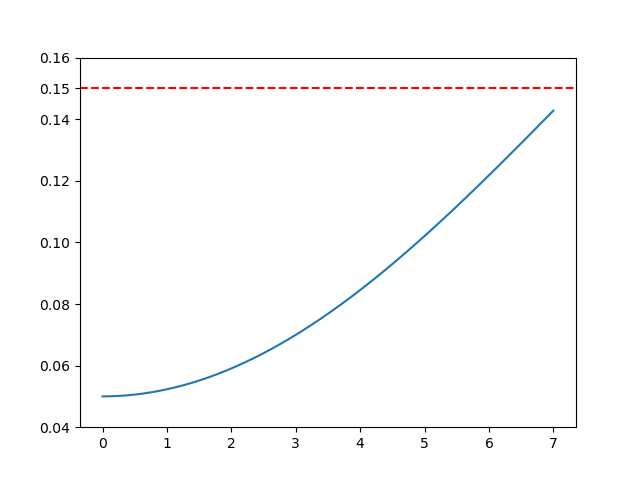

([<matplotlib.axis.YTick at 0x15f6e2feb80>,
 [Text(0, 0.04, '0.04'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.08, '0.08'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.12, '0.12'),
  Text(0, 0.14, '0.14'),
  Text(0, 0.16, '0.16'),
  Text(0, 0.15, '0.15')])

In [127]:
T,X,U,V = ballbeammodel(0.0002,0.0001,5.545,0.014,0.15)
plt.figure(91)
plt.plot(T,X)
plt.axhline(0.15,linestyle ='--',color = 'r')
extraticks = [0.15]
plt.yticks(list(plt.yticks()[0]) + extraticks)

# TESTING SIMC TUNING RESULTS

<IPython.core.display.Javascript object>


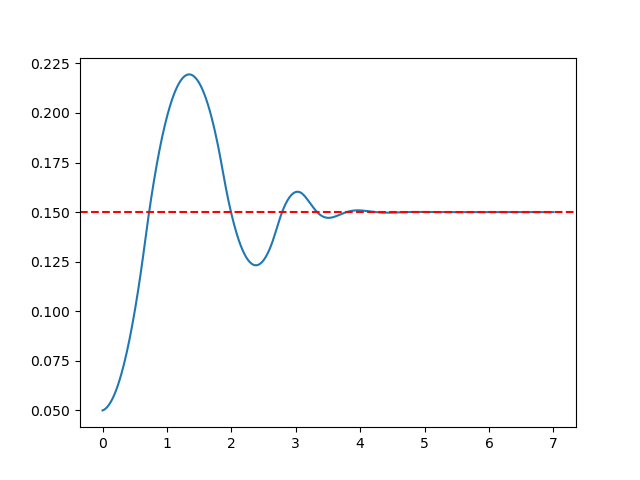

In [130]:
T,X,U,V = ballbeammodel(85,8.5,212,0.014,0.15)
plt.figure(92)
plt.plot(T,X)
plt.axhline(0.15,linestyle ='--',color = 'r')


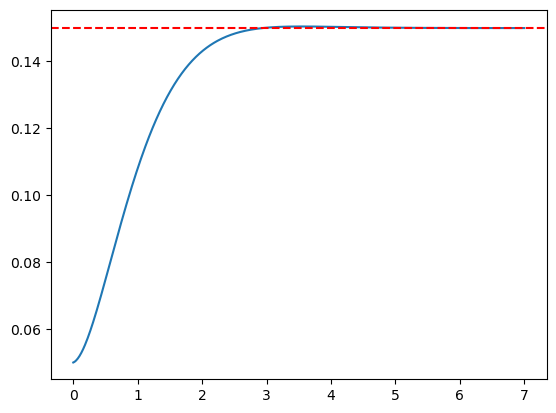

In [8]:
T,X,U,V = ballbeammodel(5,5,3,0.014,0.15)
plt.plot(T,X)
plt.axhline(0.15,linestyle ='--',color = 'r')


# CODE BELOW FOR MODEL WITHOUT DELAY - IGNORE

In [ ]:
# #parameters
# dt = 0.014   #time constant
# tf = 20      #time period of simulation
# limit = 35   #limit of angle of beam in degrees
# L = 0.30     #beam length
# m = 0.023    #ball mass
# R = 0.02     #ball radius
# g = 9.8      #gravitational acceleration
# d = 0.12     #lever arm offset
# J = (2/3)*m*R**2    #Moment of inertia of a hollow sphere
# #J = (2/5)*m*R**2   #Moment of inertia of a solid sphere

# def ballbeammodel2(Kp,Kd,Ki):
    
#     t = 0
#     x = 0.05
#     SP = 0.15
#     v = 0
#     u = 0
#     Ierror = 0
    
#     Ulis = []
#     Ulis.append(u)
#     Xlis = []
#     Xlis.append(x)
#     Tlis = []
#     Tlis.append(t)
#     Vlis = []
#     Vlis.append(v)
    
#     while (t<tf):
#         u = max(-limit,min(limit,Kp*(x-SP)+Kd*v+Ki*(Ierror+((x-SP)*(dt)))))
        
#         t += dt
#         v += (-m*g*np.sin(u*(np.pi/180))/(((J/R**2)+m)))*(dt)
#         x += v*(dt)
#         x = max(0,min(L,x))
#         Ierror += (x-SP)*dt
        
        
        
#         Ulis.append(u)
#         Tlis.append(t)
#         Vlis.append(v)
#         Xlis.append(x)
        
        
#     return Tlis,Xlis,Ulis,Vlis


# Sensitivity Study for PID Coefficients on Response

In [7]:
Kpvec = np.linspace(1,50,7)
Kd =3
Ki =0.3
plt.figure(1)
for i in range(len(Kpvec)):
    if i == 0:
        plt.axhline(0.15,linestyle='dotted',color = 'r',label='setpoint')
        plt.xlabel('Time [s]',fontsize=15)
        plt.ylabel('Displacement [x]',fontsize=15)
        plt.title('Model Responses for Different Kp Values',fontsize=15)
    Kp = Kpvec[i]
    T,X,U,V = ballbeammodel(Kp,Kd,Ki,0.014,0.15)
    plt.plot(T,X,label='Kp = {}'.format(round(Kpvec[i])))
    
    
    plt.legend(loc='lower right',framealpha=0.5)


In [8]:
Kp = 4
Kdvec = np.linspace(1,20,7)
Ki =0.3
plt.figure(2)
for i in range(len(Kdvec)):
    if i == 0:
        plt.axhline(0.15,linestyle='dotted',color = 'r',label='setpoint')
        plt.xlabel('Time [s]',fontsize=15)
        plt.ylabel('Displacement [x]',fontsize=15)
        plt.title('Model Responses for Different Kd Values',fontsize=15)
    Kd = Kdvec[i]
    T,X,U,V = ballbeammodel(Kp,Kd,Ki,0.014,0.15)
    plt.plot(T,X,label='Kd = {}'.format(round(Kdvec[i])))
    
    
    plt.legend(loc='lower right',framealpha=0.5)


In [9]:
Kp = 4
Kd = 3
Kivec =np.linspace(0,50,50)
plt.figure(3)
for i in range(len(Kivec)):
    if i == 0:
        plt.axhline(0.15,linestyle='dotted',color = 'r',label='setpoint')
        plt.xlabel('Time [s]',fontsize=15)
        plt.ylabel('Displacement [x]',fontsize=15)
        plt.title('Model Responses for Ki Values from 0 to 50',fontsize=15)
    Ki = Kivec[i]
    T,X,U,V = ballbeammodel(Kp,Kd,Ki,0.014,0.15)
    plt.plot(T,X)
    if i == 49:
        plt.plot(T,X,label='Ki = {}'.format(round(Kivec[i])),linewidth=3,color = 'fuchsia')
    
    
    plt.legend(loc='lower right',framealpha=0.5)


# Slightly Different Model Code for Next Section

In [11]:
#parameters
tf = 7      #time period of simulation
limit = 35   #limit of angle of beam in degrees
L = 0.3    #beam length
m = 0.023    #ball mass
R = 0.02    #ball radius
g = -9.8      #gravitational acceleration
d = 0.03     #lever arm offset
J = (2/3)*m*R**2    #Moment of inertia of a hollow sphere
#J = (2/5)*m*R**2   #Moment of inertia of a solid sphere

def ballbeammodel(Kp,Kd,Ki):
    dt = 0.014    #time constant
    t = 0
    x = 0.05
    SP = 0.15
    v = 0
    u = 0
    Ierror = 0
    uprev = 0
    
    Ulis = []
    Ulis.append(u)
    Xlis = []
    Xlis.append(x)
    Tlis = []
    Tlis.append(t)
    Vlis = []
    Vlis.append(v)
    
    while (t<tf):
        u = max((-limit*(np.pi/180)),min((limit*(np.pi/180)),Kp*(x-SP)+Kd*v+Ki*((x-SP)*(dt))))*(d/L)
        
        udot = (u-uprev)/dt
        t += dt
        v += ((m*g*np.sin(u)+(m*x*udot**2))/(((J/R**2)+m)))*(dt)
        x += v*(dt)
        x = max(0,min(L,x))
        uprev = u
        
        
        Ulis.append(u)
        Tlis.append(t)
        Vlis.append(v)
        Xlis.append(x)
        
        PO = (np.max(Xlis)-SP)/SP*100
        for i in range(len(Xlis)):
            if Xlis[i]>(SP*1.01) or Xlis[i]<(SP*0.99):
                ST = Tlis[i]
    return Tlis,Xlis,Ulis,Vlis,PO,ST

def costfunc(Kp,Kd,Ki):

    T,X,U,V,PO,ST = ballbeammodel(Kp,Kd,Ki)
    err = []
    for i in range(0,len(U)):
        error = abs(0.15-X[i])
        err.append(error)
    q = sp.integrate.trapz(err,T)
    return q,PO,ST

# Sensitivity Study for PID Coefficients on Performance Characteristics

In [12]:
Kpvec = np.linspace(1,100,1000)
Kd =3
Ki =0.3
qar = []
POar = []
STar = []
X = np.ones_like(Kpvec)
fig1,ax1 = plt.subplots(3,1)

for i in range(len(Kpvec)):
    Kp = Kpvec[i]
    q,PO,ST = costfunc(Kp,Kd,Ki)
    qar.append(q)
    POar.append(PO)
    STar.append(ST)

    X[i]=Kpvec[i]
    
ax1[0].plot(X,qar,label = 'IAE')
ax1[0].set_ylabel('IAE',fontsize='15')
ax1[0].set_xlabel('Kp',fontsize='15')
ax1[1].plot(X,POar,label='PO')
ax1[1].set_ylabel('PO',fontsize='15')
ax1[1].set_xlabel('Kp',fontsize='15')
ax1[2].plot(X,STar,label='ST')
ax1[2].set_ylabel('ST',fontsize='15')
ax1[2].set_xlabel('Kp',fontsize='15')

print('Min IAE:',qar[np.argmin(qar)],', Kp for min:',Kpvec[np.argmin(qar)])
print('Min PO:',POar[np.argmin(POar)],', Kp for min:',Kpvec[np.argmin(POar)])
print('Min ST:',STar[np.argmin(STar)],', Kp for min:',Kpvec[np.argmin(STar)])

Min IAE: 0.08542260480353542 , Kp for min: 10.216216216216216
Min PO: -4.3746308857454865 , Kp for min: 1.0
Min ST: 3.653999999999977 , Kp for min: 1.990990990990991


In [14]:
fig1.suptitle('Different Performance Metrics vs Kp for Constant Ki and Kd',fontsize=15)

Text(0.5, 0.98, 'Different Performance Metrics vs Kp for Constant Ki and Kd')

In [15]:
Kp = 4
Kdvec =np.linspace(1,100,1000)
Ki =0.3
qar = []
POar = []
STar = []
X = np.ones_like(Kdvec)
fig2,ax2 = plt.subplots(3,1)
fig2.suptitle('Different Performance Metrics vs Kd for Constant Ki and Kp',fontsize=15)
for i in range(len(Kdvec)):
    Kd = Kdvec[i]
    q,PO,ST = costfunc(Kp,Kd,Ki)
    qar.append(q)
    POar.append(PO)
    STar.append(ST)

    X[i]=Kdvec[i]
    
ax2[0].plot(X,qar,label = 'IAE')
ax2[0].set_ylabel('IAE',fontsize='15')
ax2[0].set_xlabel('Kd',fontsize='15')
ax2[1].plot(X,POar,label='PO')
ax2[1].set_ylabel('PO',fontsize='15')
ax2[1].set_xlabel('Kd',fontsize='15')
ax2[2].plot(X,STar,label='ST')
ax2[2].set_ylabel('ST',fontsize='15')
ax2[2].set_xlabel('Kd',fontsize='15')

print('Min IAE:',qar[np.argmin(qar)],', Kd for min:',Kdvec[np.argmin(qar)])
print('Min PO:',POar[np.argmin(POar)],', Kd for min:',Kdvec[np.argmin(POar)])
print('Min ST:',STar[np.argmin(STar)],', Kd for min:',Kdvec[np.argmin(STar)])

Min IAE: 0.10165485741332554 , Kd for min: 3.4774774774774775
Min PO: -50.15923104465857 , Kd for min: 100.0
Min ST: 2.4779999999999944 , Kd for min: 4.171171171171171


In [16]:
Kp = 4
Kd =3
Kivec =np.linspace(1,100,1000)
qar = []
POar = []
STar = []
X = np.ones_like(Kivec)
fig3,ax3 = plt.subplots(3,1)
fig3.suptitle('Different Performance Metrics vs Ki for Constant Kp and Kd',fontsize=15)
for i in range(len(Kivec)):
    Ki = Kivec[i]
    q,PO,ST = costfunc(Kp,Kd,Ki)
    qar.append(q)
    POar.append(PO)
    STar.append(ST)

    X[i]=Kivec[i]
    
ax3[0].plot(X,qar,label = 'IAE')
ax3[0].set_ylabel('IAE',fontsize='15')
ax3[0].set_xlabel('Ki',fontsize='15')
ax3[1].plot(X,POar,label='PO')
ax3[1].set_ylabel('PO',fontsize='15')
ax3[1].set_xlabel('Ki',fontsize='15')
ax3[2].plot(X,STar,label='ST')
ax3[2].set_ylabel('ST',fontsize='15')
ax3[2].set_xlabel('Ki',fontsize='15')

print('Min IAE:',qar[np.argmin(qar)],', Ki for min:',Kivec[np.argmin(qar)])
print('Min PO:',POar[np.argmin(POar)],', Ki for min:',Kivec[np.argmin(POar)])
print('Min ST:',STar[np.argmin(STar)],', Ki for min:',Kivec[np.argmin(STar)])

Min IAE: 0.09294632296256415 , Ki for min: 100.0
Min PO: 7.225416281862573 , Ki for min: 1.0
Min ST: 3.6819999999999764 , Ki for min: 22.603603603603602
